# Transition function

In [1]:
include("../../src/learning_scenarios/TransitionFunction.jl")

combineTransitionFunction

## Building a transition function from scratch

In [2]:

tl = TransitionFunction{Int64,String}(20) #,"Year","SLR")
add_transition!(tl,2020,0,"A",10)
add_transition!(tl,2020,0,"B",20)
add_transition!(tl,2020,0,"C",30)
add_transition!(tl,2040,10,"A",20)
add_transition!(tl,2040,10,"B",40)
tl

TransitionFunction{Int64, String}(20, "Time", "Data", Dict(2040 => Dict(10 => Dict("B" => [(1.0, 40)], "A" => [(1.0, 20)])), 2020 => Dict(0 => Dict("B" => [(1.0, 20)], "A" => [(1.0, 10)], "C" => [(1.0, 30)]))))

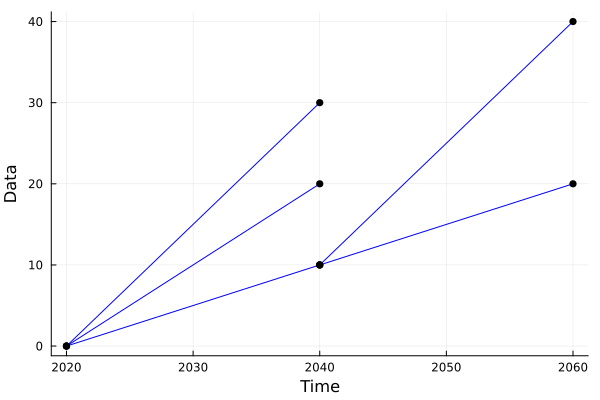

In [3]:
plot(tl)

In [4]:
time_steps(tl)

2-element Vector{Int64}:
 2020
 2040

In [7]:
TransitionFunction{Int64,String}(20)

TransitionFunction{Int64, String}(20, "Time", "Data", Dict{Int64, Dict{Int64, Dict{String, Vector{Tuple{Float64, Int64}}}}}())

## Building a transition function using high-level functions

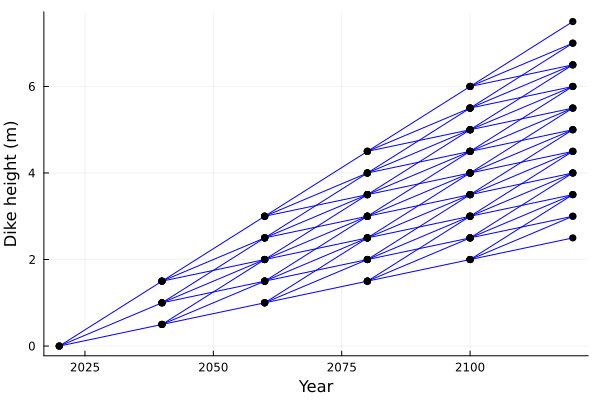

In [4]:
# Example: determinist transition function with 
# - start state 4
# - three possible actions in each time step: 1, 2, 3
# A narrative would be that we have an initial dike of 4m and can raise this by 1 ort 2 meters every year
# tl_dike = TransitionFunction{Int64}{Int64}(20,0,s->[1,2,3],(s,a)->[(1.0,(s+a))],2)
# tl_dike = TransitionFunction{Int64}{Int64}([2020,2040,2060],0,s->[1,2,3],(s,a)->[(1.0,(s+a))])
tl_dike = TransitionFunction{Float64}{Float64}(2020:20:2100,0.0,s->[0.5,1.0,1.5],(s,a)->[(1.0,(s+a))];unit_time="Year", unit_data="Dike height (m)")

plot(tl_dike)

In [ ]:
tl_dike

In [3]:
time_steps(tl_dike)

5-element Vector{Int64}:
 2020
 2040
 2060
 2080
 2100

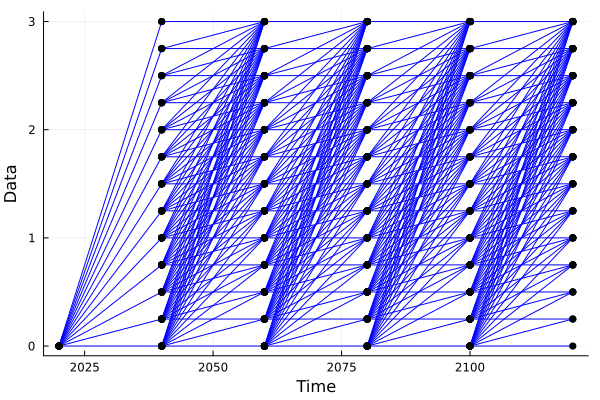

In [19]:
tl_dike = TransitionFunction{Float64}{Float64}(2020:20:2100, 0.0,s->collect(0:.25:(3-s)),(s,a)->[(1.0,(s+a))])
plot1(tl_dike)

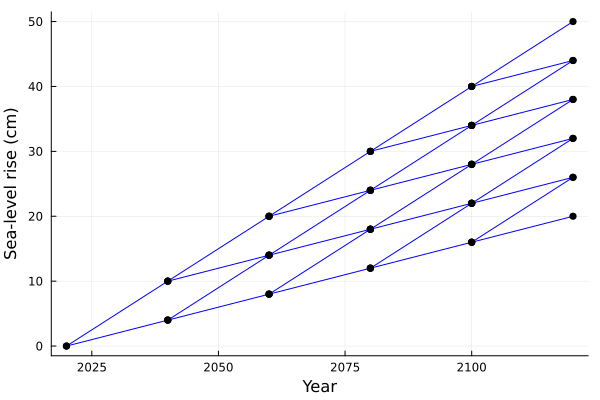

In [29]:
# stochastic transition function (e.g., sea-level rise)

# tl_slr = TransitionFunction(Int64,Nothing, 20,s->[nothing],(s,a)->[(.7,s+5),(.3,s+4)],5)
tl_slr = TransitionFunction{Float64,Nothing}(2020:20:2100,0.0,s->[nothing],(s,a)->[(.7,s+10),(.3,s+4)], unit_time="Year", unit_data="Sea-level rise (cm)")
plot1(tl_slr)